## gQIR Scenes

1. DieDrop0002: 000001 - 000004 (First 4 frames)    

2. Helmet0002: (First 4 frames)    

3. compositeScene0001:    
(F1) seq: '007990', '007991', '007993', '007994'     
(F2) seq: '005001', '005002', '005003', '005004'

4. christmasLights0003:  
(Lights On) seq: '015234', '015235', '015236', '015237'   
(Lights Off Vase) seq: '019988', '019989', '019990', '019991'

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

In [18]:
f = h5py.File('./christmasLights0003/data.ubi.h5', 'r')

In [19]:
list(f.keys())

['capture_integrated', 'raw_hdf5']

In [20]:
capture_grp = f["capture_integrated"]["raw_hdf5"]

In [ ]:
capture_grp.keys()

<KeysViewHDF5 ['000000', '000001', '000002', '000003', '000004', '000005', '000006', '000007', '000008', '000009', '000010', '000011', '000012', '000013', '000014', '000015', '000016', '000017', '000018', '000019', '000020', '000021', '000022', '000023', '000024', '000025', '000026', '000027', '000028', '000029', '000030', '000031', '000032', '000033', '000034', '000035', '000036', '000037', '000038', '000039', '000040', '000041', '000042', '000043', '000044', '000045', '000046', '000047', '000048', '000049', '000050', '000051', '000052', '000053', '000054', '000055', '000056', '000057', '000058', '000059', '000060', '000061', '000062', '000063', '000064', '000065', '000066', '000067', '000068', '000069', '000070', '000071', '000072', '000073', '000074', '000075', '000076', '000077', '000078', '000079', '000080', '000081', '000082', '000083', '000084', '000085', '000086', '000087', '000088', '000089', '000090', '000091', '000092', '000093', '000094', '000095', '000096', '000097', '0000

(1024, 1024) 0 1


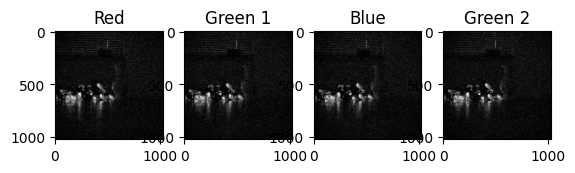

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


(1024, 1024) uint16


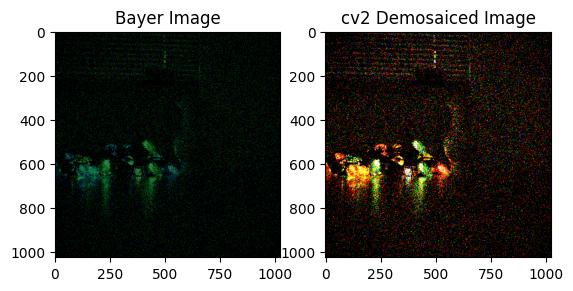

In [28]:
sample_r  = capture_grp['015234'] # '019988', '019989', '019990', '019991'
sample_g1 = capture_grp['015235']
sample_b  = capture_grp['015236']
sample_g2 = capture_grp['015237']
# print(sample_r.shape, sample_g.shape, sample_b.shape)
frame_r, frame_g1, frame_b, frame_g2 = np.array(sample_r)[:,:,0,0], np.array(sample_g1)[:,:,0,0], np.array(sample_b)[:,:,0,0], np.array(sample_g2)[:,:,0,0]
print(frame_r.shape, frame_r.min(), frame_r.max())

plt.subplot(1,4,1)
plt.imshow(frame_r, cmap='gray')
plt.title('Red')
plt.subplot(1,4,2)
plt.imshow(frame_g1, cmap='gray')
plt.title('Green 1')
plt.subplot(1,4,3)
plt.imshow(frame_b, cmap='gray')
plt.title('Blue')
plt.subplot(1,4,4)
plt.imshow(frame_g2, cmap='gray')
plt.title('Green 2')
plt.show()

# Combine into bayer grid
H, W = frame_r.shape
bayer = np.zeros((H, W), dtype=np.uint16)

# fill Bayer positions (RGGB)
bayer[0::2, 0::2] = frame_r[0::2, 0::2]     # R
bayer[0::2, 1::2] = frame_g1[0::2, 1::2]    # G1
bayer[1::2, 0::2] = frame_g2[1::2, 0::2]    # G2
bayer[1::2, 1::2] = frame_b[1::2, 1::2]     # B

viz_bayer = np.zeros((H, W, 3), dtype=np.float32)
viz_bayer[0::2, 0::2, 0] = frame_r[0::2, 0::2]
viz_bayer[0::2, 1::2, 1] = frame_g1[0::2, 1::2]
viz_bayer[1::2, 0::2, 1] = frame_g2[1::2, 0::2]
viz_bayer[1::2, 1::2, 2] = frame_b[1::2, 1::2]

print(bayer.shape, bayer.dtype)
color_frame = cv2.demosaicing(bayer, cv2.COLOR_BayerRG2RGB)

plt.subplot(1,2,2)
plt.imshow(color_frame*255.0)
plt.title('cv2 Demosaiced Image')
plt.subplot(1,2,1)
plt.imshow(viz_bayer)
plt.title('Bayer Image')
plt.show()